# Car re-sale Price Prediction


#### Data Source: Kaggle
#### Refrence: Kirsh Naik
#### Contents: EDA, Modeling and Evaluation

In [1]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics as stats

## _Loading Dataset_

In [2]:
og_data = pd.read_csv('car data.csv')
og_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
print(og_data.info())
print("-"*80)
print("<No. of Unique Values>")
print(og_data.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 16.5+ KB
None
--------------------------------------------------------------------------------
<No. of Unique Values>
Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64


## _EDA_

#### Analyzing behavior of Categorical features wrt Selling Price

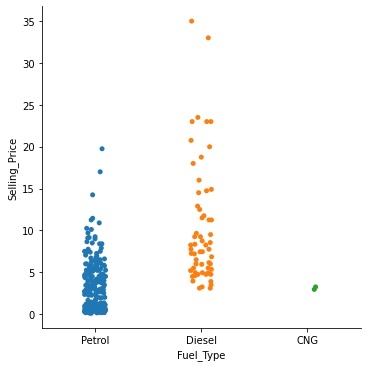

In [4]:
#SP wrt Fuel_Type
sns.catplot(x='Fuel_Type',y='Selling_Price',
            data=og_data)

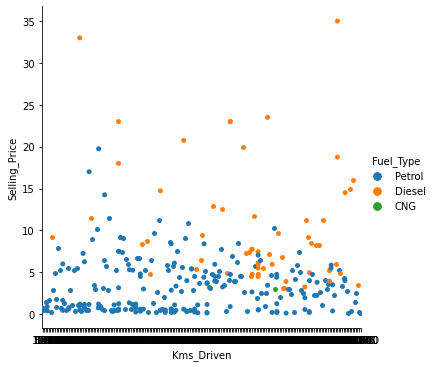

In [6]:
#SP wrt Kms Driven
sns.catplot(y='Selling_Price',x='Kms_Driven',
            hue='Fuel_Type',
            data=og_data)

Fuel_Type,CNG,Diesel,Petrol
Transmission,,,
Automatic,0,12,28
Manual,2,48,211


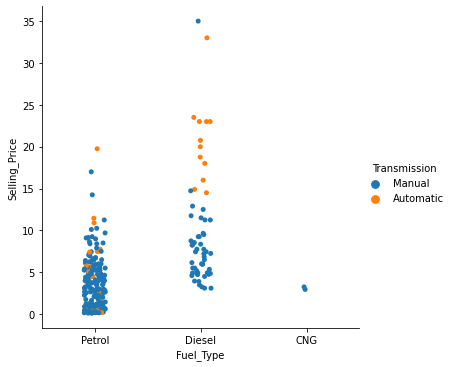

In [7]:
#Is Price depended on the Transimission Type ?
sns.catplot(y='Selling_Price',hue='Transmission',
            x='Fuel_Type',
            data=og_data)
pd.crosstab(og_data['Transmission'],og_data['Fuel_Type'])

#_Automatic Diesel cars are priced much higher

#_Automatic Petrol Cars have standard price irrespective of the transmission

#_Price independant of Transmission

Seller_Type,Dealer,Individual
Owner,,
0,191,99
1,4,6
3,0,1


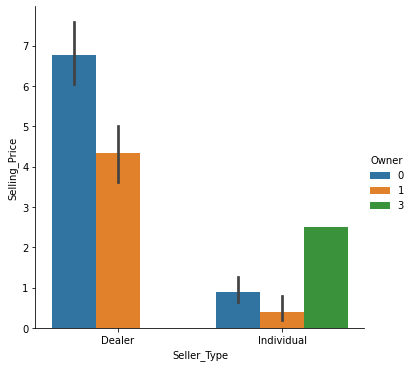

In [8]:
#SP wrt Owners
sns.catplot(y='Selling_Price',hue='Owner',
            x='Seller_Type',
            data=og_data, kind ='bar')
pd.crosstab(og_data['Owner'],og_data['Seller_Type'])

#_Mostly first hand car owners opt for dealers to sell the car

#_First Hand cars are sold at a higher rate

#### Price Trend based on the Year

<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>

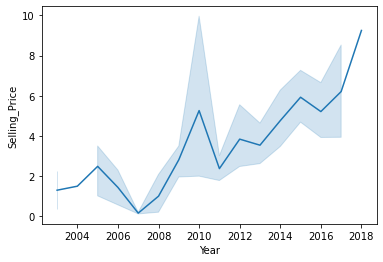

In [9]:
#SP wrt Years
sns.lineplot(x='Year',y='Selling_Price',data=og_data)

<AxesSubplot:xlabel='Year', ylabel='Present_Price'>

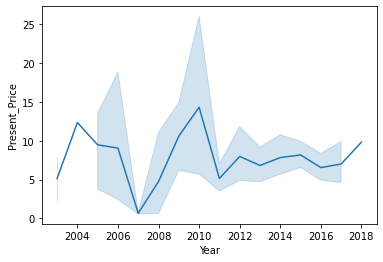

In [10]:
###_Considering Present_Price to be the Price of the car when it was bought i.e Cost_Price_###

sns.lineplot(x='Year',y='Present_Price',data=og_data)

<AxesSubplot:xlabel='Year', ylabel='Profit'>

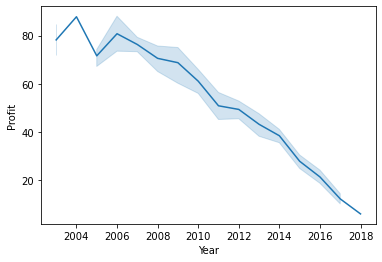

In [11]:
#Creating profit persent column
og_data['Profit'] = ((og_data['Present_Price']-og_data['Selling_Price'])/og_data['Present_Price'])*100
sns.lineplot(x='Year',y='Profit',data=og_data)

#### Exploring Statistics

In [12]:
og_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Profit
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189,36.554836
std,2.891554,5.082812,8.644115,38886.883882,0.247915,20.236878
min,2003.000000,0.100000,0.320000,500.000000,0.000000,1.074547
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,20.993228
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,34.537246
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,49.494949
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,89.464812


<ipython-input-13-209bff5a4d3b>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  og_data.hist(ax=ax)


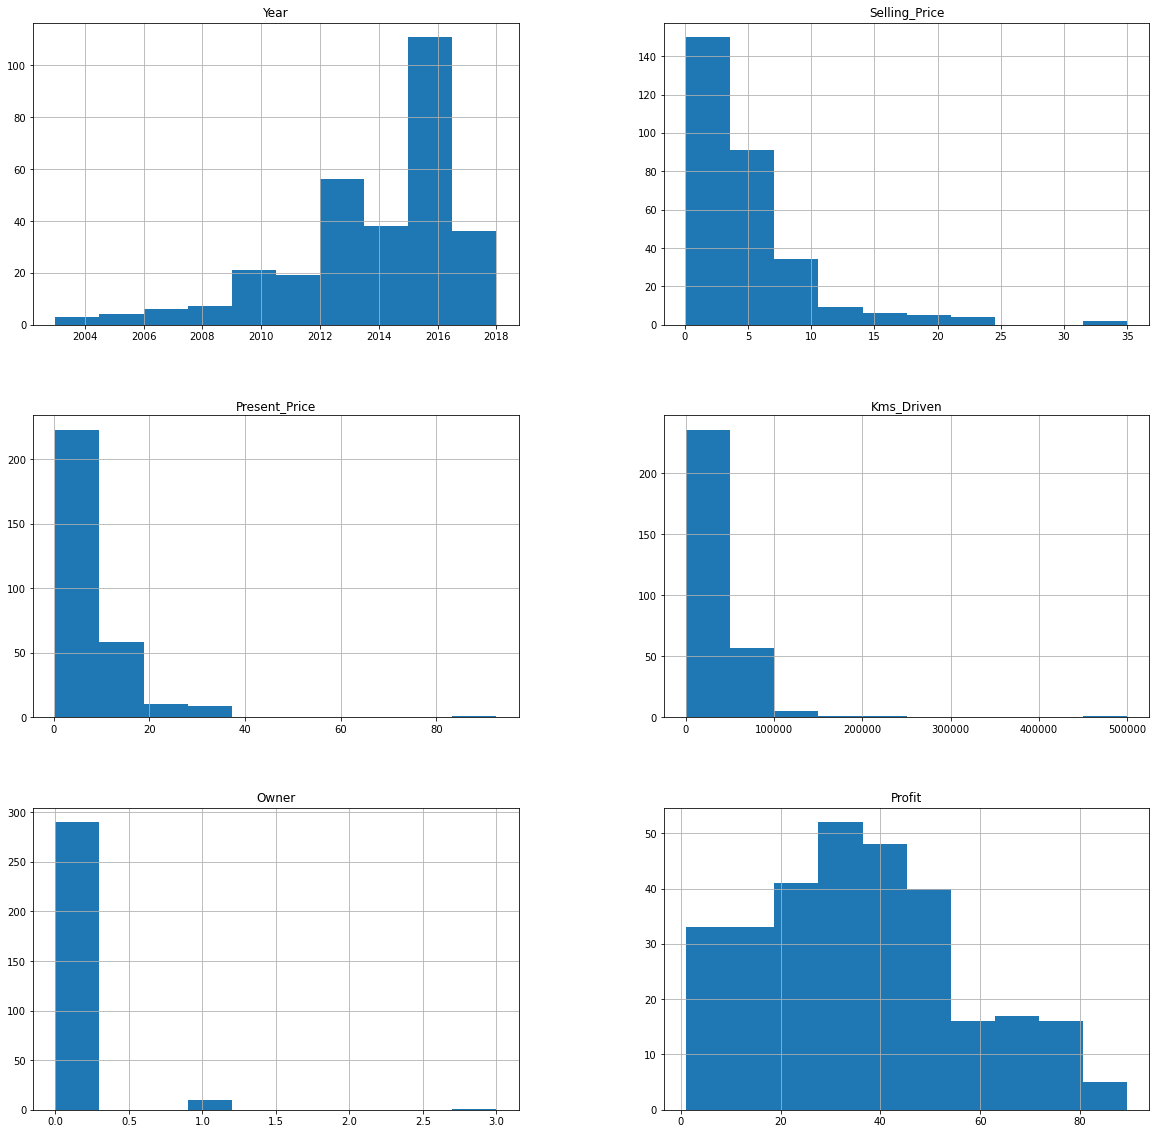

In [13]:
fig, ax = plt.subplots(figsize=(20,20))
og_data.hist(ax=ax)
plt.show()

#### Treating Outliers

#_Priority: Selling Price -> Present_Price -> Kms_Driven

C:\Users\Kanchan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling_Price'>

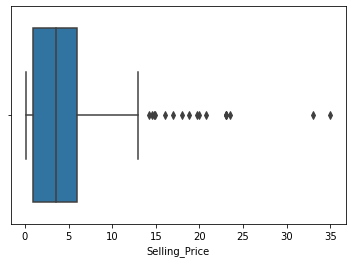

In [14]:
#Selling Price
sns.boxplot(og_data['Selling_Price'])

In [15]:
###_Detecting Outliers with the help of IQR
#Defining Variables
q3 = og_data['Selling_Price'].quantile(0.75)
q1 = og_data['Selling_Price'].quantile(0.25)
IQR = q3 - q1

In [16]:
#Defining function to detect outliers
def find_outliers(data):
    outliers = []
    lower = q1 - (IQR*1.5)
    upper = q3 + (IQR*1.5)
    for i in data:
        if ((i < lower) | (i>upper)):
            outliers.append(i)
        else:
            continue
    return outliers

In [17]:
#Outliers in Selling_Price are:
sp_out = find_outliers(og_data['Selling_Price'])
sp_out

[14.9,
 23.0,
 18.0,
 16.0,
 19.99,
 18.75,
 23.5,
 33.0,
 19.75,
 14.25,
 14.5,
 14.73,
 23.0,
 35.0,
 23.0,
 20.75,
 17.0]

In [18]:
#Checking %
(len(sp_out)/len(og_data))*100

5.647840531561462

In [19]:
#Dropping Outliers from SP
indices = og_data[og_data['Selling_Price'].isin(sp_out)].index
proc_data_1 = og_data.drop(indices)
proc_data_1.shape

(284, 10)

C:\Users\Kanchan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling_Price'>

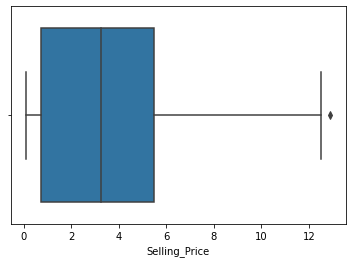

In [20]:
sns.boxplot(proc_data_1['Selling_Price'])

In [21]:
proc_data_2 = proc_data_1.drop(proc_data_1[proc_data_1['Selling_Price'] > 12].index)
proc_data_2.shape

(282, 10)

C:\Users\Kanchan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling_Price'>

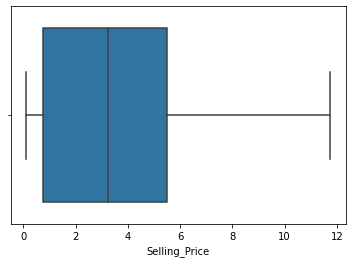

In [22]:
sns.boxplot(proc_data_2['Selling_Price'])

<AxesSubplot:>

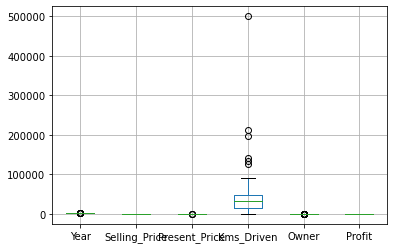

In [23]:
#Vizualizing Outliers again
proc_data_2.boxplot()

In [24]:
###_Detecting Outliers with the help of IQR
#Defining Variables
q3 = proc_data_2['Kms_Driven'].quantile(0.75)
q1 = proc_data_2['Kms_Driven'].quantile(0.25)
IQR = q3 - q1

In [25]:
#Outliers in Selling_Price are:
km_out = find_outliers(proc_data_2['Kms_Driven'])
km_out

[127000, 135154, 197176, 142000, 213000, 500000]

In [26]:
#Checking %
(len(km_out)/len(og_data))*100

1.9933554817275747

In [27]:
#Dropping the outliers
#Dropping Outliers from SP
indices = proc_data_2[proc_data_2['Kms_Driven'].isin(km_out)].index
proc_data_3 = proc_data_2.drop(indices)
proc_data_3.shape

(276, 10)

C:\Users\Kanchan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kms_Driven'>

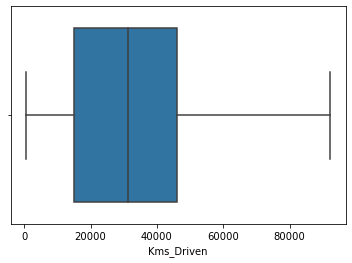

In [28]:
sns.boxplot(proc_data_3['Kms_Driven'])

## _Feature Engineering_

#### Adding Car age from Year

In [29]:
cuurent_yr = 2021
proc_data_3['Car_Age'] = 2021 - proc_data_3['Year']
proc_data_3.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Profit,Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,40.071556,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,50.209644,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,26.395939,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,31.325301,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,33.042213,7


C:\Users\Kanchan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Car_Age'>

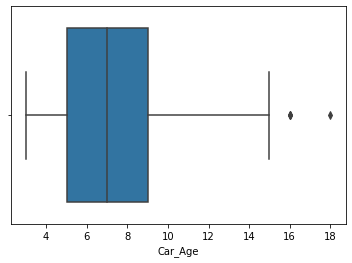

In [30]:
sns.boxplot(proc_data_3['Car_Age'])

In [31]:
#Outliers >15
age_out = proc_data_3[proc_data_3['Car_Age'] > 15].index
len(age_out)

4

In [32]:
#Removing outliers from Age
proc_data = proc_data_3.drop(age_out)
proc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 0 to 300
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       272 non-null    object 
 1   Year           272 non-null    int64  
 2   Selling_Price  272 non-null    float64
 3   Present_Price  272 non-null    float64
 4   Kms_Driven     272 non-null    int64  
 5   Fuel_Type      272 non-null    object 
 6   Seller_Type    272 non-null    object 
 7   Transmission   272 non-null    object 
 8   Owner          272 non-null    int64  
 9   Profit         272 non-null    float64
 10  Car_Age        272 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 21.2+ KB


#### Re-checking for Inconsistency

<AxesSubplot:>

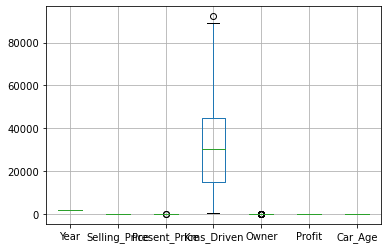

In [33]:
proc_data.boxplot()

In [34]:
proc_data[proc_data['Kms_Driven'] > 90000]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Profit,Car_Age
200,Bajaj Pulsar 150,2006,0.1,0.75,92233,Petrol,Individual,Manual,0,86.666667,15


In [35]:
proc_data = proc_data.drop(200)
proc_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Profit,Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,40.071556,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,50.209644,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,26.395939,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,31.325301,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,33.042213,7
...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,18.103448,5
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,32.203390,6
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,69.545455,12
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,8.000000,4


#### _Removing Unwanted Cols_

In [36]:
proc_data = proc_data.drop(['Car_Name','Profit','Year'], axis=1)

In [37]:
proc_data

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,5
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,6
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,12
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,4


## _Converting Categorical Features_

In [38]:
#Using one hot encoding
proc_data = pd.get_dummies(proc_data, drop_first=True)
proc_data

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,5,1,0,0,1
297,4.00,5.90,60000,0,6,0,1,0,1
298,3.35,11.00,87934,0,12,0,1,0,1
299,11.50,12.50,9000,0,4,1,0,0,1


In [39]:
#Only 9 features -> No Need of hypertuning

## _Model Building_

#### Splitting Set

In [40]:
X = proc_data.drop(['Selling_Price'],axis=1)
Y = proc_data['Selling_Price']

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.2,train_size=0.8)

#### Iteration 1

In [59]:
#Using Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.9915904150605759

#### Iteration 2

In [60]:
#Trying to tweak n_estimators and max_features
score = []
for i in range(1,500,50):
    rf = RandomForestRegressor(n_estimators=i)
    rf.fit(X_train,y_train)
    plot = rf.score(X_train,y_train)
    score.append(plot)

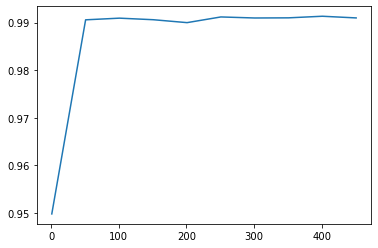

In [61]:
plt.plot(range(1,500,50),score)

In [168]:
#Max features
rf = RandomForestRegressor(n_estimators=50, max_depth = 6, max_features='sqrt', random_state=20)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.9510446368754056

In [169]:
rf.score(X_test,y_test)

0.9130777492028797

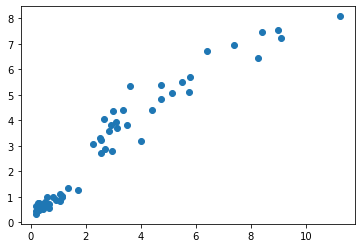

In [170]:
pred = rf.predict(X_test)
plt.scatter(y_test,pred)

In [171]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,pred)

0.5338070109622856